## OneMax problem with 1000 bits

In [1]:
from thefittest.optimizers import GeneticAlgorithm
from thefittest.benchmarks import OneMax

number_of_iterations = 100
population_size = 200
string_length = 1000

optimizer = GeneticAlgorithm(fitness_function=OneMax(),
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=string_length,
                         show_progress_each=10)

optimizer.fit()

fittest = optimizer.get_fittest()

0 iteration with fitness = 541.0
10 iteration with fitness = 681.0
20 iteration with fitness = 780.0
30 iteration with fitness = 851.0
40 iteration with fitness = 900.0
50 iteration with fitness = 933.0
60 iteration with fitness = 945.0
70 iteration with fitness = 958.0
80 iteration with fitness = 970.0
90 iteration with fitness = 978.0


## Rastrign problem with 10 variables

In [2]:
import numpy as np
from thefittest.optimizers import GeneticAlgorithm
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         selection="tournament_k",
                         crossover="two_point",
                         mutation="weak",
                         tour_size=6,
                         optimal_value=0.)

optimizer.fit()

fittest = optimizer.get_fittest()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])



0 iteration with fitness = 85.96040897590377
30 iteration with fitness = 3.30863148159621
60 iteration with fitness = 2.9870369763565936
90 iteration with fitness = 2.984892260142594
120 iteration with fitness = 2.98487721678228
150 iteration with fitness = 2.3513223180577096
180 iteration with fitness = 1.9899181169613982
210 iteration with fitness = 1.9899181141904165
240 iteration with fitness = 1.9899181141866844
270 iteration with fitness = 1.989918114186585
The fittest individ: [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Custom problem

0 iteration with fitness = 114.04853967275312
10 iteration with fitness = 0.03639389506426246
20 iteration with fitness = 1.73205437573972e-05
30 iteration with fitness = 4.479693562791022e-07
40 iteration with fitness = 2.5037550293524826e-09
The fittest individ: [1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0]
The fittest individ: [ 4.99999777 12.00000176]
with fitness -8.068319504259819e-12


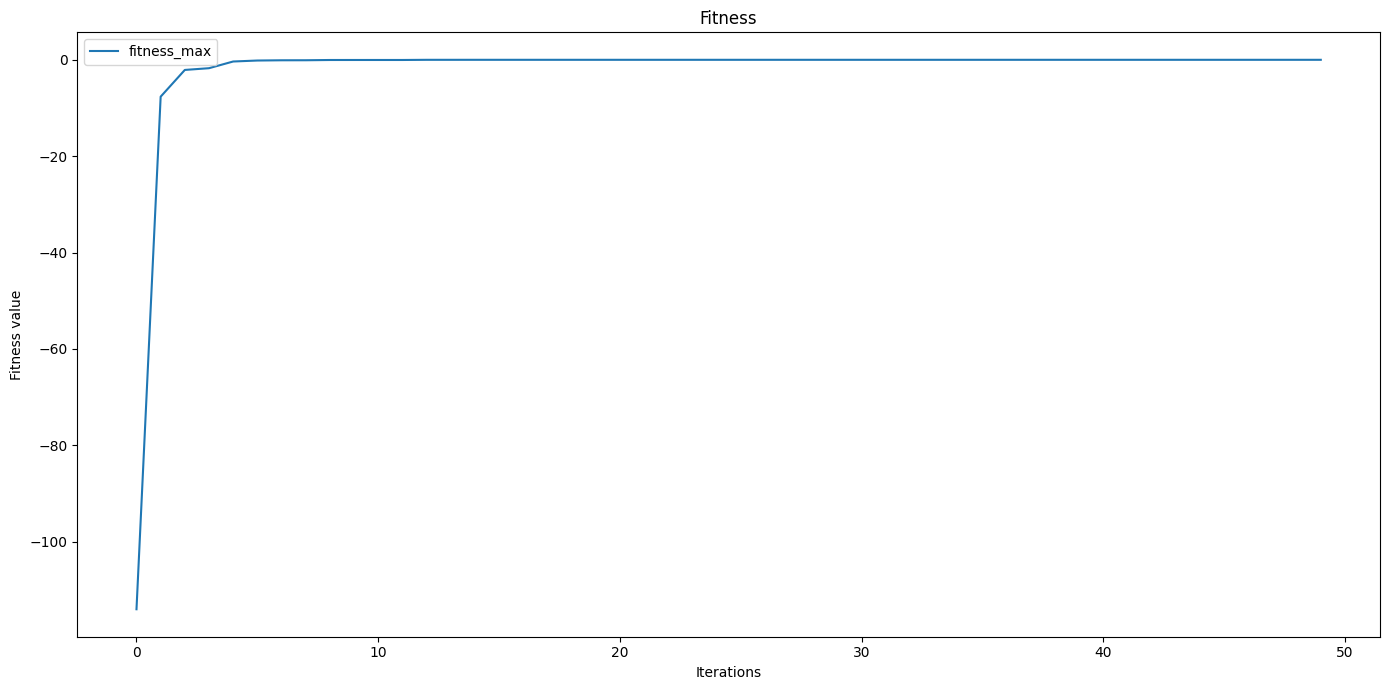

In [3]:
import numpy as np
from thefittest.optimizers import GeneticAlgorithm
from thefittest.tools.transformations import GrayCode
import matplotlib.pyplot as plt

def custom_problem(x):
    return (5 - x[:, 0])**2 + (12 - x[:, 1])**2


n_dimension = 2
left_border = -100.
right_border = 100.
n_bits_per_variable = 32

number_of_iterations = 100
population_size = 100

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)


genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=custom_problem,
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=10,
                         minimization=True,
                         optimal_value=0,
                         termination_error_value=1e-10,
                         keep_history=True,
                         elitism=False)


optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])


iters_done = len(stats['fitness_max'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=1)
ax.plot(range(iters_done), stats['fitness_max'], label = "fitness_max")
ax.set_title('Fitness')
ax.set_ylabel('Fitness value')
ax.set_xlabel("Iterations")
ax.legend()

plt.tight_layout()
plt.show()

## SelfCGA

0 iteration with fitness = 93.48247871240346
30 iteration with fitness = 1.9277111689890276
60 iteration with fitness = 1.0029190059584074
90 iteration with fitness = 0.9952594759411877
120 iteration with fitness = 0.9949608716416201
150 iteration with fitness = 0.9949590950253455
180 iteration with fitness = 0.994959057554043
210 iteration with fitness = 0.9949590571001803
240 iteration with fitness = 0.08461447279417555
270 iteration with fitness = 7.851497230149107e-13
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

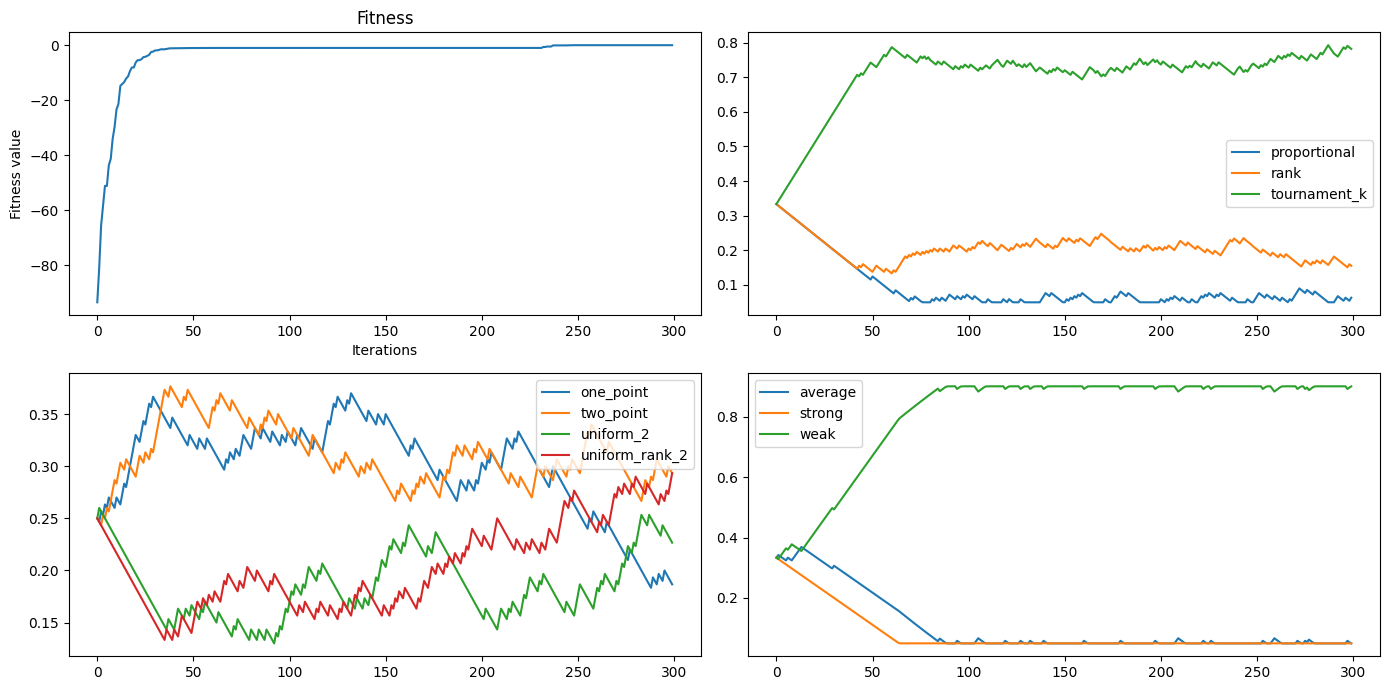

In [4]:
import numpy as np
from collections import defaultdict
from thefittest.optimizers import SelfCGA
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin
import matplotlib.pyplot as plt


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = SelfCGA(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         selections=("tournament_k", "rank", "proportional"),
                         crossovers=("two_point", "one_point", "uniform_2", "uniform_rank_2"),
                         mutations=("weak", "average", "strong"),
                         tour_size=5,
                         K=4,
                         keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)

ax[0][0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0][0].set_title('Fitness')
ax[0][0].set_ylabel('Fitness value')
ax[0][0].set_xlabel("Iterations")

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()


## SHAGA

0 iteration with fitness = 111.0052377778817
30 iteration with fitness = 19.967677862264637
60 iteration with fitness = 8.780237167799728
90 iteration with fitness = 6.984497724918375
120 iteration with fitness = 4.960104734658742
150 iteration with fitness = 2.91341928806969
180 iteration with fitness = 0.8417697866871592
210 iteration with fitness = 0.08495364480345557
240 iteration with fitness = 0.0029648864259925745
270 iteration with fitness = 5.459679751851354e-05
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 

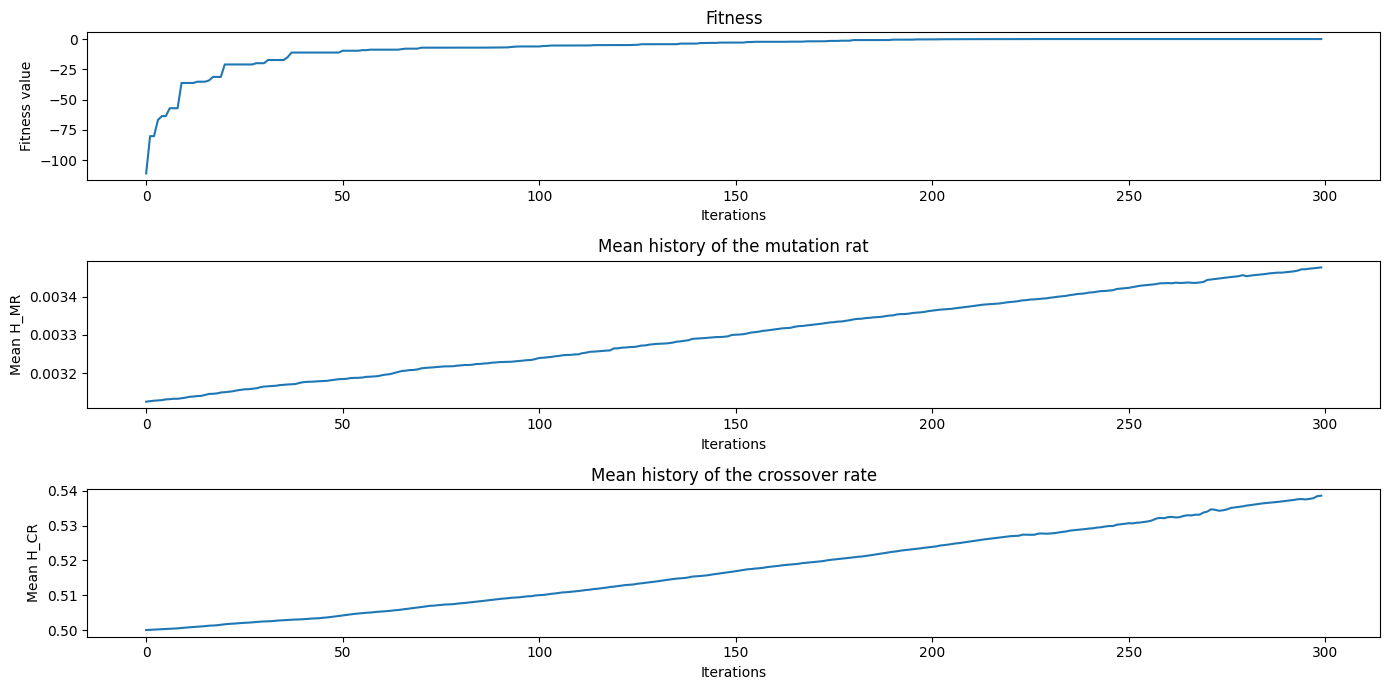

In [5]:
import numpy as np
from collections import defaultdict
from thefittest.optimizers import SHAGA
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin
import matplotlib.pyplot as plt


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = SHAGA(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=3)

ax[0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0].set_title('Fitness')
ax[0].set_ylabel('Fitness value')
ax[0].set_xlabel("Iterations")

ax[1].plot(range(number_of_iterations), np.array(stats['H_MR']).mean(axis = 1))
ax[1].set_title('Mean history of the mutation rat')
ax[1].set_ylabel('Mean H_MR')
ax[1].set_xlabel("Iterations")

ax[2].plot(range(number_of_iterations), np.array(stats['H_CR']).mean(axis = 1))
ax[2].set_title('Mean history of the crossover rate')
ax[2].set_ylabel('Mean H_CR')
ax[2].set_xlabel("Iterations")

plt.tight_layout()
plt.show()